<span style="color: blue; font-size: 30px;">Loan Approval Prediction Analysis</span>


## Background
In India, the surge in loan applications in recent years has posed a challenge for banks. Determining whether a customer is likely to repay a loan at a given interest rate differentiating between a "good" and a "bad" customer has become increasingly complex for bank employees. To address this, there is a pressing need for an Machine learning models that can predict loan suitability. Such a model, driven by historical data and customer attributes, has the potential to streamline the loan approval process and mitigate lending risks. It aligns with India's financial inclusion goals, aiming to facilitate responsible lending practices, spur economic growth, and enhance financial stability.

## Objective
The main objective of this project, "Loan Prediction Based on Customer Behavior," is to develop predictive models and analyses that leverage customer behavior and financial attributes to assess and predict the risk of loan defaults.

In [1]:
# Importing Necessary Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Loading the Data

In [2]:
# Reading the CSV file

df = pd.read_csv("Training Data.csv")

In [3]:
df


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
# Printing the shape of the dataset
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [5]:
# Info the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# describing the data
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# 2. Data Cleaning

In [7]:
df.isnull().sum()  # finding out the null values


Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [8]:
df.duplicated().sum() # finding Out any duplicates


0

In [9]:
# Remove the unwanted columns 

In [10]:
df=df.drop(columns=["Id"], axis=0)
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [11]:
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [12]:
# convert the all columns name in lower case

df.columns = df.columns.str.lower()
df.columns


Index(['income', 'age', 'experience', 'married/single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [13]:
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [14]:
df.state.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [15]:
# clean and extract alphabetical portions from the 'city' and 'state' columns of the DataFrame
df.city = df.city.str.extract("([A-Za-z]+)")
df.state = df.state.str.extract("([A-Za-z]+)")

In [16]:
df.city 

0                    Rewa
1                Parbhani
2               Alappuzha
3             Bhubaneswar
4         Tiruchirappalli
               ...       
251995            Kolkata
251996               Rewa
251997             Kalyan
251998        Pondicherry
251999              Avadi
Name: city, Length: 252000, dtype: object

In [17]:
df.state

0              Madhya
1         Maharashtra
2              Kerala
3              Odisha
4               Tamil
             ...     
251995           West
251996         Madhya
251997    Maharashtra
251998     Puducherry
251999          Tamil
Name: state, Length: 252000, dtype: object

#### Convert Categorical Data to Numeric

In [18]:
df['married/single'].unique()


array(['single', 'married'], dtype=object)

In [19]:
df['married/single'].head(10)

0     single
1     single
2    married
3     single
4     single
5     single
6    married
7     single
8     single
9     single
Name: married/single, dtype: object

In [20]:
df['house_ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [21]:
df['car_ownership'].unique()


array(['no', 'yes'], dtype=object)

In [22]:
df['car_ownership']

0          no
1          no
2          no
3         yes
4          no
         ... 
251995     no
251996     no
251997     no
251998     no
251999     no
Name: car_ownership, Length: 252000, dtype: object

In [23]:
df # In married/single column single=0, married = 1. In house_ownership 'norent_noown': 0, 'rented': 1, 'owned': 2 column. In  car_ownership column 'no': 0, 'yes': 1 


,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,Kolkata,West,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,Kalyan,Maharashtra,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


 # 3. EDA

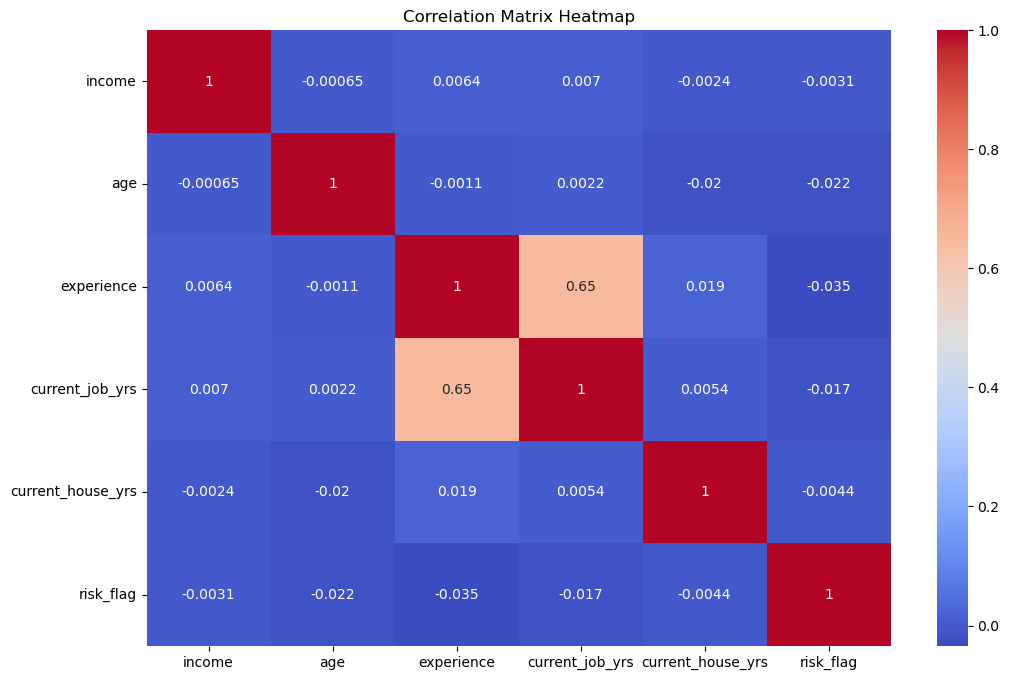

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

The resulting heatmap visually represents the relationships between numerical variables in the dataset. Positive correlations are indicated by warmer colors (toward red), negative correlations by cooler colors (toward blue), and no correlation by white. This visualization helps you identify which variables are strongly correlated, which can be useful for feature selection and understanding the data's underlying patterns.

In [25]:
# count the each professions in the dataset
professions_count = df["profession"].value_counts()
professions_count 

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

### 3.1. Finding out the top 15 professions

In [26]:
top_professions=professions_count.head(15)

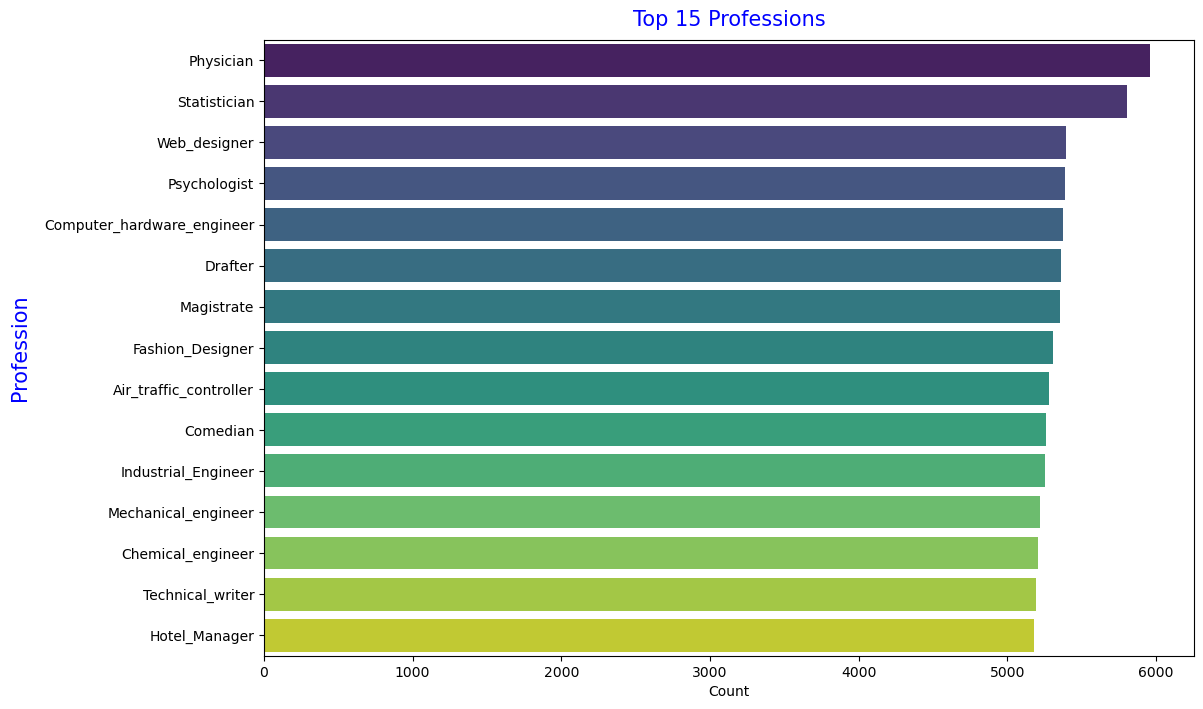

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_professions.values, y=top_professions.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Profession', labelpad=10, size =15, c="blue" )
plt.title('Top 15 Professions', pad=10, size =15, c="blue")
plt.show()

Using the barplot to findout Top 15 professions in the dataset

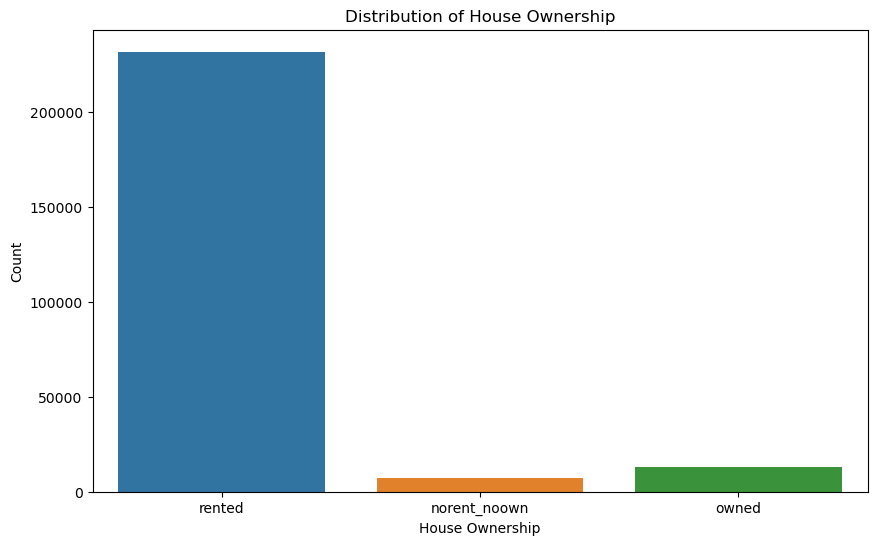

In [28]:
# Create a countplot for 'Distribution of House Ownership'.
plt.figure(figsize=(10, 6))
sns.countplot(x='house_ownership', data=df)
plt.xlabel('House Ownership')
plt.ylabel('Count')
plt.title('Distribution of House Ownership')
plt.show()

In the above graph we can observe that rental individuals are higher compaire to the two other categories

### 3.2. How is house ownership related to  risk flag?

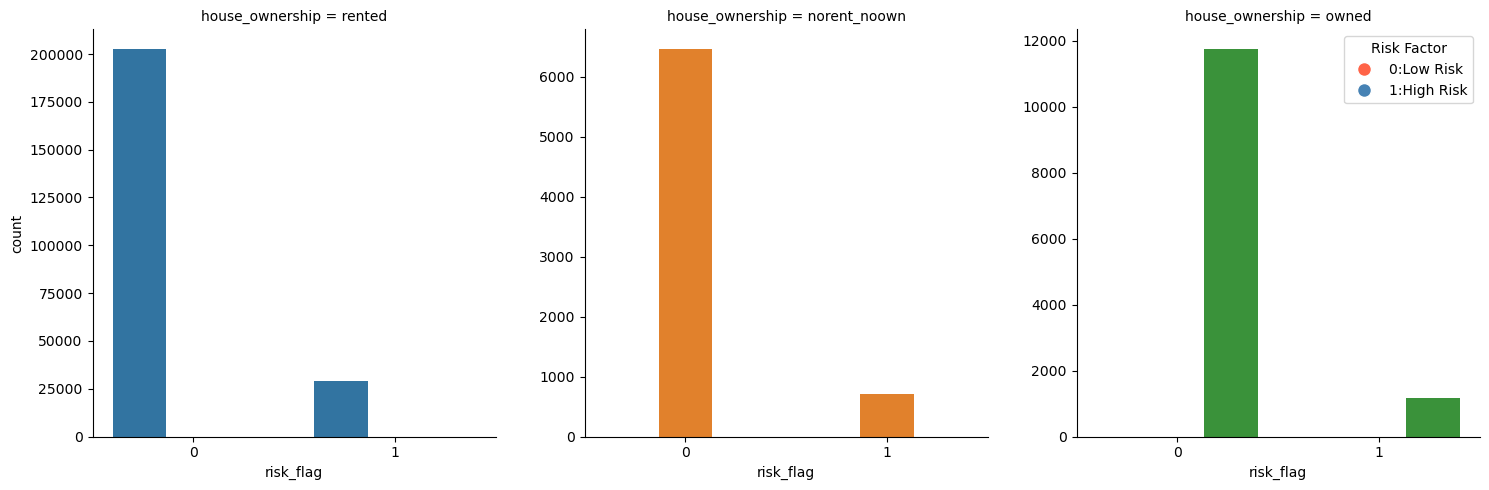

In [29]:
# Your plot code
sns.catplot(x='risk_flag', data=df, col='house_ownership', kind='count', sharey=False, hue='house_ownership')

# Get the current axes and legend
ax = plt.gca()
leg = ax.get_legend()

# Set custom labels and colors for the legend
custom_labels = ['0:Low Risk', '1:High Risk']
custom_colors = ['#FF6347', '#4682B4']  # Change colors as desired

# Create a custom legend manually
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in zip(custom_labels, custom_colors)]

# Add custom legend to the plot
ax.legend(handles=legend_elements, title='Risk Factor', loc='best')

plt.show()

We can see from the charts above that renters have the highest risk of defaulting while people that own properties are less likely to default.

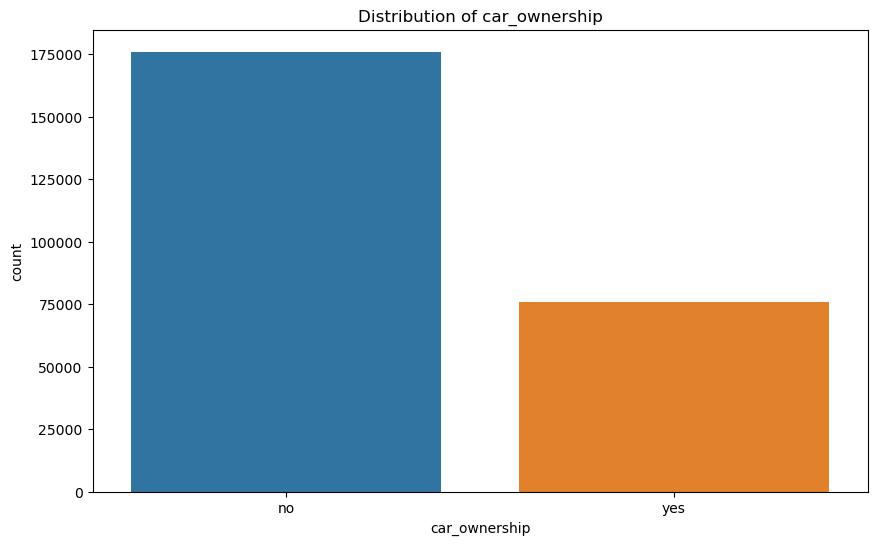

In [30]:
# Create a countplot for 'Distribution of car_ownership'.
plt.figure(figsize=(10, 6))
sns.countplot(x='car_ownership', data=df)
plt.title('Distribution of car_ownership')
plt.show()

From the above graph we can observe that no.of car ownership individuals are lower when compair to the no car ownership individuals

### 3.3. How is car ownership related to risk flag?

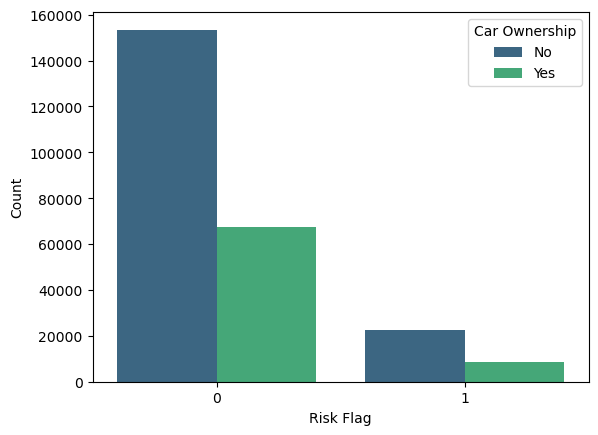

In [31]:
g = sns.countplot(x='risk_flag', data=df, hue='car_ownership', palette='viridis')
g.set(xlabel='Risk Flag', ylabel='Count')
plt.legend(title='Car Ownership', labels=['No', 'Yes'])
plt.show()


In the above graph high risk factor is lower in car ownership  indiviuals 

### 3.4. Find out how many individuals are married and how many are single in the dataset

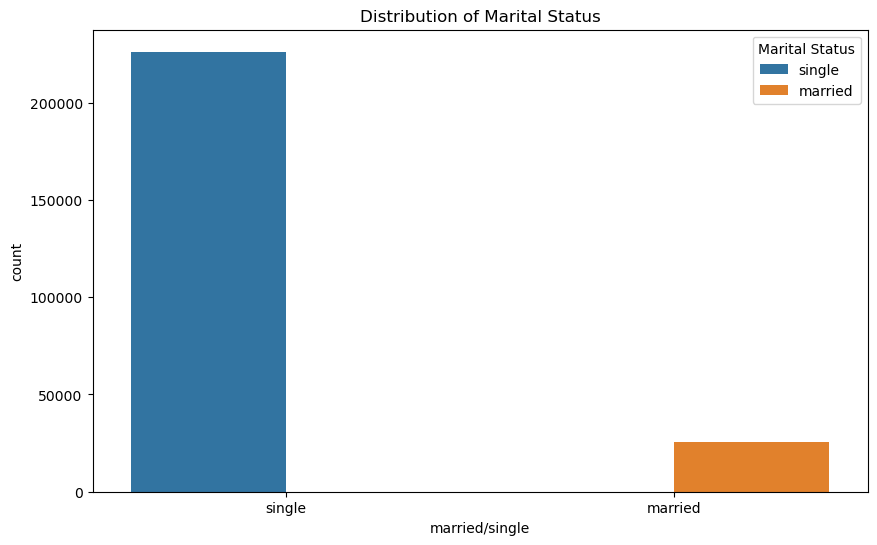

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='married/single', data=df, hue='married/single')
plt.title('Distribution of Marital Status')
plt.legend(labels=['single', 'married'], title='Marital Status')
plt.show()

From the above graph we can observed that single are higher then the married individuals

### 3.5. How is  Marital Status related to  risk flag?

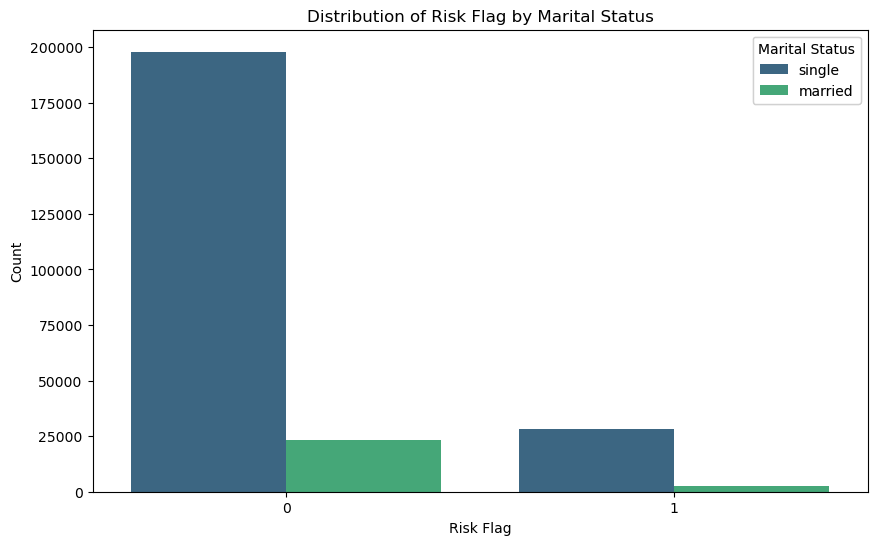

In [35]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 6))
sns.countplot(x='risk_flag', data=df, hue='married/single', palette='viridis')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.title('Distribution of Risk Flag by Marital Status')

# Create a legend for the first feature: 'Marital Status'
marital_status = plt.legend(title='Marital Status', loc='upper right')

# Add the first legend manually to the current Axes.
plt.gca().add_artist(marital_status)


plt.show()



We can observe that the low risk factor among married individuals is lower than the single individuals.

### 3.6. Identify the profession with the highest income in the dataset.



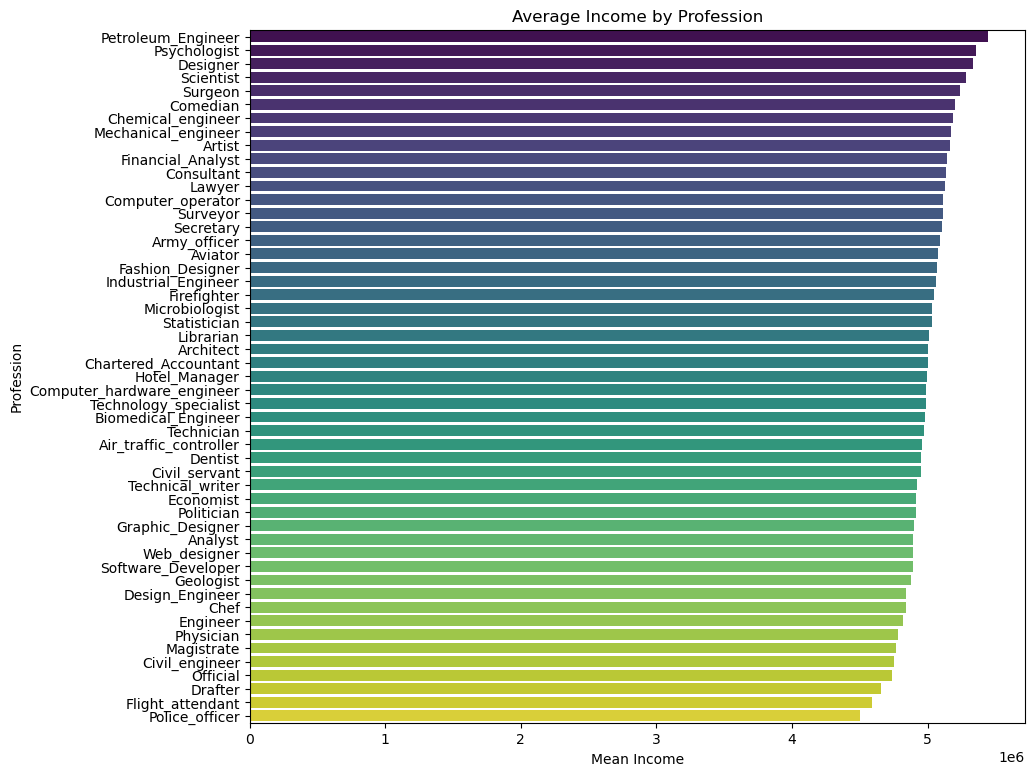

In [36]:

# Group the data by 'Profession' and calculate the mean income for each profession
income_by_profession = df.groupby('profession')['income'].mean().reset_index()
income_by_profession = income_by_profession.sort_values(by='income', ascending=False)
plt.figure(figsize=(10, 9))
sns.barplot(x='income', y='profession', data=income_by_profession, palette='viridis')
plt.xlabel('Mean Income')
plt.ylabel('Profession')
plt.title('Average Income by Profession')
plt.show()

From the above graph top 3 professions are Petroleum engineer, psychologist, designer and last 3 professions are drafter, flight attendent, Police officer.

In [37]:
df.risk_flag.value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

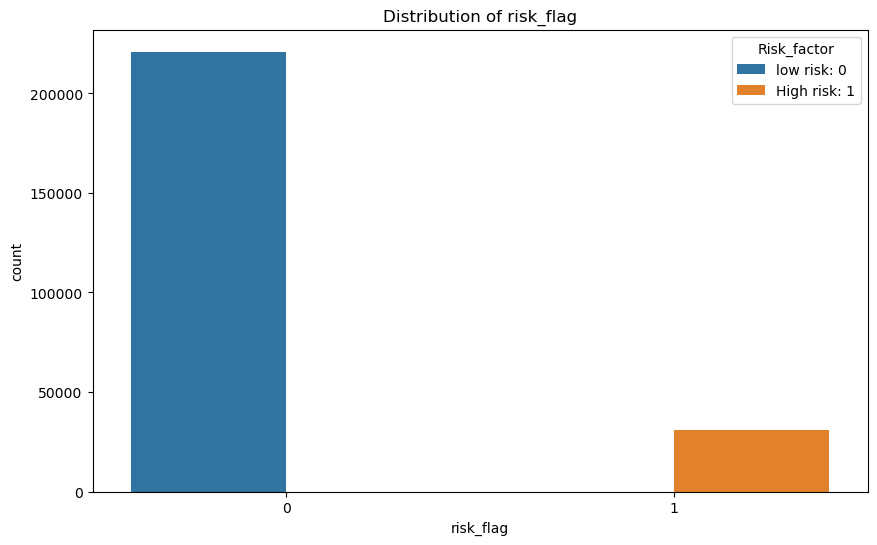

In [38]:
# counting the risk flag 
plt.figure(figsize=(10, 6))
sns.countplot(x='risk_flag', data=df, hue='risk_flag')
plt.title('Distribution of risk_flag')
plt.legend(labels=['low risk: 0', 'High risk: 1'], title='Risk_factor')
plt.show()

In the dataset, the "risk_flag" column contains significantly more 0 values (221,004) than 1 values (30,996). This class imbalance indicates that the dataset is unbalanced, as one class (0) greatly outnumbers the other class (1).

### 3.7. RandomOverSampler

The  RandomOverSampler is used to balance the class distribution by increasing the number of instances in the minority class through random duplication.

In [39]:
X = df.drop("risk_flag",axis = 1)
y = df["risk_flag"]
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

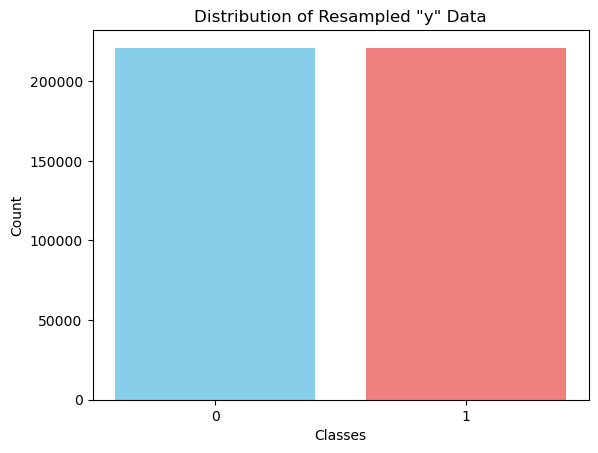

In [40]:

y = pd.Series(y)
value_counts = y.value_counts()
# Create the bar plot and store it in a variable
bar=plt.bar(value_counts.index, value_counts.values,color = ['skyblue', 'lightcoral'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks([0, 1]) 
plt.title('Distribution of Resampled "y" Data')
# Add the legend
#plt.legend(bar, ['low risk: 0', 'High risk: 1'], title='Risk_factor')
plt.show()

In [41]:
y.value_counts()

0    221004
1    221004
Name: risk_flag, dtype: int64

In [42]:
print(df.columns)


Index(['income', 'age', 'experience', 'married/single', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')


# 4 ML Models


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and split your dataset into X and y (as you've done previously)

# Define the categorical and numerical columns
categorical_columns = ['married/single', 'car_ownership', 'house_ownership', 'profession', 'city', 'state']
numerical_columns = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']
# Create preprocessing transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # 'ignore' handles new categories not seen during training
])

# Combine transformers for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)

# Create the final pipeline by combining preprocessing and modeling
pipeline = Pipeline(steps=[('preprocess', preprocessor), ('classifier', classifier)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9573539060202257


In [47]:
# Evaluate the model
print("RandomForest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForest Accuracy: 0.9573539060202257
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     44323
           1       0.92      1.00      0.96     44079

    accuracy                           0.96     88402
   macro avg       0.96      0.96      0.96     88402
weighted avg       0.96      0.96      0.96     88402



In [45]:
!pip install xgboost
import xgboost as xgb

# Create an XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the XGBoost classifier
xgboost_pipeline = Pipeline(steps=[('preprocess', preprocessor), ('classifier', xgboost_classifier)])

# Fit the model to the training data
xgboost_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgboost = xgboost_pipeline.predict(X_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))


XGBoost Accuracy: 0.7951630053618697
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     44323
           1       0.78      0.82      0.80     44079

    accuracy                           0.80     88402
   macro avg       0.80      0.80      0.80     88402
weighted avg       0.80      0.80      0.80     88402



In [46]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Create a pipeline that includes preprocessing and the Decision Tree classifier
decision_tree_pipeline = Pipeline(steps=[('preprocess', preprocessor), ('classifier', decision_tree_classifier)])

# Fit the model to the training data
decision_tree_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Accuracy: 0.9417433994706003
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     44323
           1       0.90      1.00      0.94     44079

    accuracy                           0.94     88402
   macro avg       0.95      0.94      0.94     88402
weighted avg       0.95      0.94      0.94     88402

